In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
emp_attrition = pd.read_csv('/content/test.csv.zip')

In [ ]:
emp_attrition

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [ ]:
emp_attrition.shape

(14900, 24)

In [ ]:
emp_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [ ]:
emp_attrition.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


**Encoding**

In [ ]:
emp_attrition["Gender"].value_counts()

,count
Gender,
Male,8087
Female,6813


In [ ]:
emp_attrition["Gender"]=emp_attrition["Gender"].replace({"Male":1,"Female":2})

/tmp/ipython-input-3402369104.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Gender"]=emp_attrition["Gender"].replace({"Male":1,"Female":2})


In [ ]:
emp_attrition["Job Role"].value_counts()

,count
Job Role,
Technology,3815
Healthcare,3432
Education,3168
Media,2422
Finance,2063


In [ ]:
emp_attrition["Job Role"]=emp_attrition["Job Role"].replace({"Technology":1,"Healthcare":2,"Education":3,"Media":4,"Finance":5})

/tmp/ipython-input-994503003.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Job Role"]=emp_attrition["Job Role"].replace({"Technology":1,"Healthcare":2,"Education":3,"Media":4,"Finance":5})


In [ ]:
emp_attrition["Work-Life Balance"].value_counts()

,count
Work-Life Balance,
Good,5630
Fair,4483
Excellent,2713
Poor,2074


In [ ]:
emp_attrition["Work-Life Balance"]=emp_attrition["Work-Life Balance"].replace({"Good":1,"Fair":2,"Excellent":3,"Poor":4})

/tmp/ipython-input-2087216321.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Work-Life Balance"]=emp_attrition["Work-Life Balance"].replace({"Good":1,"Fair":2,"Excellent":3,"Poor":4})


In [ ]:
emp_attrition["Job Satisfaction"].value_counts()

,count
Job Satisfaction,
High,7466
Very High,2968
Medium,2900
Low,1566


In [ ]:
emp_attrition["Job Satisfaction"]=emp_attrition["Job Satisfaction"].replace({"High":1,"Very High":2,"Medium":3,"Low":4})

/tmp/ipython-input-3623716524.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Job Satisfaction"]=emp_attrition["Job Satisfaction"].replace({"High":1,"Very High":2,"Medium":3,"Low":4})


In [ ]:
emp_attrition["Performance Rating"].value_counts()

,count
Performance Rating,
Average,8909
High,3022
Below Average,2189
Low,780


In [ ]:
emp_attrition["Performance Rating"]=emp_attrition["Performance Rating"].replace({"Average":1,"High":2,"Below Average":3,"Low":4})

/tmp/ipython-input-149628766.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Performance Rating"]=emp_attrition["Performance Rating"].replace({"Average":1,"High":2,"Below Average":3,"Low":4})


In [ ]:
emp_attrition["Education Level"].value_counts()

,count
Education Level,
Bachelor’s Degree,4505
Associate Degree,3734
Master’s Degree,3001
High School,2932
PhD,728


In [ ]:
emp_attrition["Education Level"]=emp_attrition["Education Level"].replace({"Bachelor’s Degree":1,"Associate Degree":2,"Master’s Degree":3,"High School":4,"PhD":5})

/tmp/ipython-input-1180150940.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Education Level"]=emp_attrition["Education Level"].replace({"Bachelor’s Degree":1,"Associate Degree":2,"Master’s Degree":3,"High School":4,"PhD":5})


In [ ]:
emp_attrition["Marital Status"].value_counts()

,count
Marital Status,
Married,7511
Single,5166
Divorced,2223


In [ ]:
emp_attrition["Marital Status"]=emp_attrition["Marital Status"].replace({"Married":1,"Single":2,"Divorced":3})

/tmp/ipython-input-4231051793.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Marital Status"]=emp_attrition["Marital Status"].replace({"Married":1,"Single":2,"Divorced":3})


In [ ]:
emp_attrition["Job Level"].value_counts()

,count
Job Level,
Mid,5925
Entry,5913
Senior,3062


In [ ]:
emp_attrition["Job Level"]=emp_attrition["Job Level"].replace({"Mid":1,"Entry":2,"Senior":3})

/tmp/ipython-input-3280548001.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Job Level"]=emp_attrition["Job Level"].replace({"Mid":1,"Entry":2,"Senior":3})


In [ ]:
emp_attrition["Company Size"].value_counts()

,count
Company Size,
Medium,7486
Small,4420
Large,2994


In [ ]:
emp_attrition["Company Size"]=emp_attrition["Company Size"].replace({"Medium":1,"Small":2,"Large":3})

/tmp/ipython-input-1329654975.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Company Size"]=emp_attrition["Company Size"].replace({"Medium":1,"Small":2,"Large":3})


In [ ]:
emp_attrition["Remote Work"].value_counts()

,count
Remote Work,
No,12061
Yes,2839


In [ ]:
emp_attrition["Remote Work"]=emp_attrition["Remote Work"].replace({"No":0,"Yes":1})

/tmp/ipython-input-2516982975.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Remote Work"]=emp_attrition["Remote Work"].replace({"No":0,"Yes":1})


In [ ]:
emp_attrition["Company Reputation"].value_counts()

,count
Company Reputation,
Good,7416
Poor,3082
Fair,2969
Excellent,1433


In [ ]:
emp_attrition["Company Reputation"]=emp_attrition["Company Reputation"].replace({"Good":1,"Poor":2,"Fair":3,"Excellent":4})

/tmp/ipython-input-1658218784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Company Reputation"]=emp_attrition["Company Reputation"].replace({"Good":1,"Poor":2,"Fair":3,"Excellent":4})


In [ ]:
emp_attrition["Employee Recognition"].value_counts()

,count
Employee Recognition,
Low,5862
Medium,4624
High,3706
Very High,708


In [ ]:
emp_attrition["Employee Recognition"]=emp_attrition["Employee Recognition"].replace({"Low":1,"Medium":2,"High":3,"Very High":4})

/tmp/ipython-input-2290100102.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Employee Recognition"]=emp_attrition["Employee Recognition"].replace({"Low":1,"Medium":2,"High":3,"Very High":4})


In [ ]:
emp_attrition["Attrition"].value_counts()

,count
Attrition,
Stayed,7868
Left,7032


In [ ]:
emp_attrition["Attrition"]=emp_attrition["Attrition"].replace({"Stayed":1,"Left":0})

/tmp/ipython-input-2590850731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition["Attrition"]=emp_attrition["Attrition"].replace({"Stayed":1,"Left":0})


In [ ]:
emp_attrition

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,1,13,2,8029,3,1,1,1,...,1,1,3,22,0,No,No,2,2,1
1,30585,35,1,7,3,4563,1,1,1,1,...,4,2,1,27,0,No,No,1,3,0
2,54656,50,1,7,3,5583,2,1,1,3,...,2,3,1,76,0,No,Yes,1,1,1
3,33442,58,1,44,4,5525,2,2,2,0,...,4,2,1,96,0,No,No,2,1,0
4,15667,39,1,24,3,4604,1,1,1,0,...,6,1,3,45,1,No,No,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,2,42,2,7830,4,3,1,0,...,0,3,1,60,0,No,No,2,2,1
14896,47175,30,2,15,3,3856,1,3,1,2,...,0,2,1,20,0,No,No,1,2,0
14897,12409,52,1,5,3,5654,1,2,3,0,...,4,1,2,7,0,No,No,1,3,0
14898,9554,18,1,4,3,5276,2,1,1,0,...,3,1,3,5,0,No,No,2,3,1


In [ ]:
emp_attrition=emp_attrition.replace({"No":0,"Yes":1})

/tmp/ipython-input-1749417998.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emp_attrition=emp_attrition.replace({"No":0,"Yes":1})


In [ ]:
emp_attrition=emp_attrition.drop(["Employee ID"],axis=1)

In [ ]:
emp_attrition

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,36,1,13,2,8029,3,1,1,1,1,...,1,1,3,22,0,0,0,2,2,1
1,35,1,7,3,4563,1,1,1,1,1,...,4,2,1,27,0,0,0,1,3,0
2,50,1,7,3,5583,2,1,1,3,1,...,2,3,1,76,0,0,1,1,1,1
3,58,1,44,4,5525,2,2,2,0,1,...,4,2,1,96,0,0,0,2,1,0
4,39,1,24,3,4604,1,1,1,0,1,...,6,1,3,45,1,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,56,2,42,2,7830,4,3,1,0,1,...,0,3,1,60,0,0,0,2,2,1
14896,30,2,15,3,3856,1,3,1,2,1,...,0,2,1,20,0,0,0,1,2,0
14897,52,1,5,3,5654,1,2,3,0,0,...,4,1,2,7,0,0,0,1,3,0
14898,18,1,4,3,5276,2,1,1,0,0,...,3,1,3,5,0,0,0,2,3,1


In [ ]:
emp_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       14900 non-null  int64
 1   Gender                    14900 non-null  int64
 2   Years at Company          14900 non-null  int64
 3   Job Role                  14900 non-null  int64
 4   Monthly Income            14900 non-null  int64
 5   Work-Life Balance         14900 non-null  int64
 6   Job Satisfaction          14900 non-null  int64
 7   Performance Rating        14900 non-null  int64
 8   Number of Promotions      14900 non-null  int64
 9   Overtime                  14900 non-null  int64
 10  Distance from Home        14900 non-null  int64
 11  Education Level           14900 non-null  int64
 12  Marital Status            14900 non-null  int64
 13  Number of Dependents      14900 non-null  int64
 14  Job Level                 14900 non-nu

DATA SPLITTING

In [ ]:
x=emp_attrition.drop(["Attrition"],axis=1)
y=emp_attrition["Attrition"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 0.21490882, -0.921214  ,  1.02830185, ..., -0.4391298 ,
        -0.86677911,  0.05151777],
       [ 1.20785295, -0.921214  , -1.1384097 , ...,  2.277231  ,
        -0.86677911, -1.04900522],
       [-1.43999807,  1.0855241 , -0.23561322, ..., -0.4391298 ,
        -0.86677911, -1.04900522],
       ...,
       [-0.03332721, -0.921214  , -0.86757075, ..., -0.4391298 ,
         0.09514315,  1.15204076],
       [ 1.12510761, -0.921214  , -0.05505392, ...,  2.277231  ,
        -0.86677911,  0.05151777],
       [-1.60548876,  1.0855241 , -0.7772911 , ...,  2.277231  ,
        -0.86677911,  2.25256375]])

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred=model.predict(x_train)
accuracy=accuracy_score(y_train,y_pred)
accuracy

0.6598154362416108

In [ ]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.640268456375839

model underfitting (**not well trained on training data**)

K NEAREST NEIGHBORS  (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
KN_pred=model.predict(x_train)
train_acc=accuracy_score(y_train,KN_pred)
train_acc

0.6899328859060403

In [ ]:
KN_pred=model.predict(x_test)
test_acc=accuracy_score(y_test,KN_pred)
test_acc

0.5355704697986577

OVERFITTING (well on training but fail in testing)

In [ ]:
overfitting_gap=train_acc-test_acc
overfitting_gap

0.15436241610738255

RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = RandomForestClassifier(n_estimators=200,max_depth=7,random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [ ]:
RF_pred=model.predict(x_train)
train_acc=accuracy_score(y_train,RF_pred)
train_acc

0.7626677852348993

In [ ]:
RF_pred=model.predict(x_test)
test_acc=accuracy_score(y_test,RF_pred)
test_acc

0.7322147651006712

WELL-FITTED MODEL (better generalization)

In [ ]:
gap=train_acc-test_acc
gap

0.030453020134228126

In [ ]:
import seaborn as sns

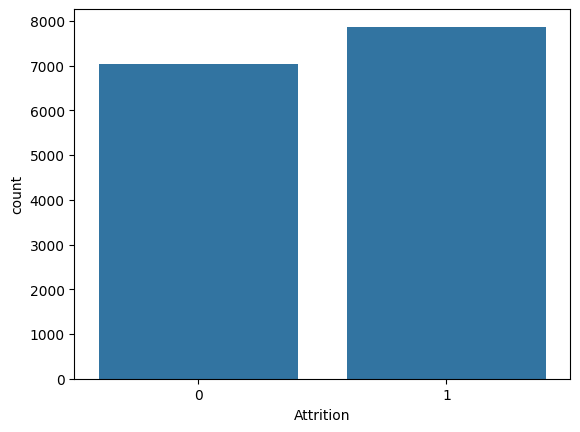

In [ ]:
sns.countplot(x="Attrition",data=emp_attrition)
plt.show()

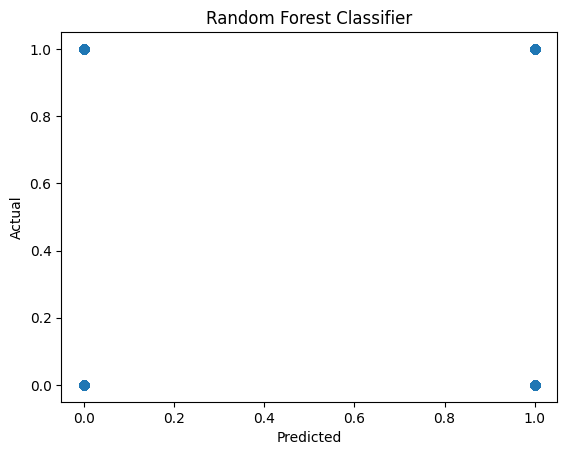

In [ ]:
plt.scatter(RF_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Classifier")
plt.show()

In [ ]:
cm=confusion_matrix(y_test,RF_pred)
cm


array([[1028,  428],
       [ 370, 1154]])

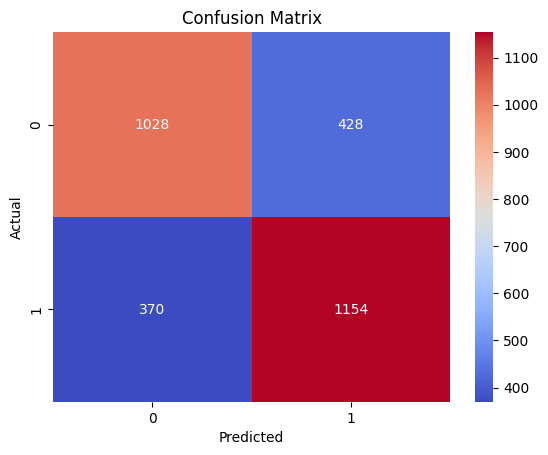

In [ ]:
cm=confusion_matrix(y_test,RF_pred)
sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1456
           1       0.73      0.76      0.74      1524

    accuracy                           0.73      2980
   macro avg       0.73      0.73      0.73      2980
weighted avg       0.73      0.73      0.73      2980



SUPPORT VECTOR MACHINE (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [ ]:
model=SVC(kernel="rbf",C=100,gamma=0.001,class_weight="balanced")

In [ ]:
model.fit(x_train_sc,y_train)

SVC(C=100, class_weight='balanced', gamma=0.001)

In [ ]:
svm_pred=model.predict(x_train_sc)
train_acc=accuracy_score(y_train,svm_pred)
train_acc

0.7342281879194631

In [ ]:
svm_pred=model.predict(x_test_sc)
test_acc=accuracy_score(y_test,svm_pred)
test_acc

0.7144295302013423

In [ ]:
overfitting_gap=train_acc-test_acc
overfitting_gap

0.019798657718120838

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid={"C":[1,10,100,1000],"gamma":[ 0.001,0.01,0.1,1,10]}

In [ ]:
model=GridSearchCV(SVC(),grid,cv=5,scoring="accuracy")

In [ ]:
model.fit(x_train_sc,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [ ]:
svm_pred_Grid=model.predict(x_train_sc)
train_acc=accuracy_score(y_train,svm_pred_Grid)
train_acc

In [ ]:
svm_pred_Grid=model.predict(x_test_sc)
test_acc=accuracy_score(y_test,svm_pred_Grid)
test_acc

UNDERFITTING train < test